# AdaBoost Regression

In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, mean_absolute_error, mean_absolute_percentage_error, r2_score

from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import plot_tree

# Load Data

In [2]:
# Read data:
data = pd.read_parquet("data/regression/insurance_preprocessed.parquet")

# Test/train Split

In [3]:
# Test/Train Split:
X = data.drop(["charges"], axis = 1)
y = data["charges"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.33)

# Fit Model

In [4]:
pipe = Pipeline([("regressor", AdaBoostRegressor())])
param_grid = {"regressor__n_estimators": range(1, 100, 10),
              "regressor__learning_rate": np.arange(0.001, 1.1, 0.01)}
grid_search = GridSearchCV(pipe, param_grid, cv = 5, verbose = 1, n_jobs = -1)
grid_search.fit(X_train, y_train)
print("Best Param: ", grid_search.best_params_)
model = grid_search.best_estimator_

Fitting 5 folds for each of 1100 candidates, totalling 5500 fits
Best Param:  {'regressor__learning_rate': 0.7309999999999999, 'regressor__n_estimators': 1}


# Model Evaluation

In [5]:
y_pred = model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
mape = mean_absolute_percentage_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)
print("MSE:", mse)
print("RMSE:", rmse)
print("R2 Score:", r2)
print("MAE:", mae)
print("MAPE:", mape)

MSE: 21624204.000200637
RMSE: 4650.183222218307
R2 Score: 0.8483961856056724
MAE: 2767.681179154404
MAPE: 0.35295755373124593


# Visualize Model

Visualize the first estimator

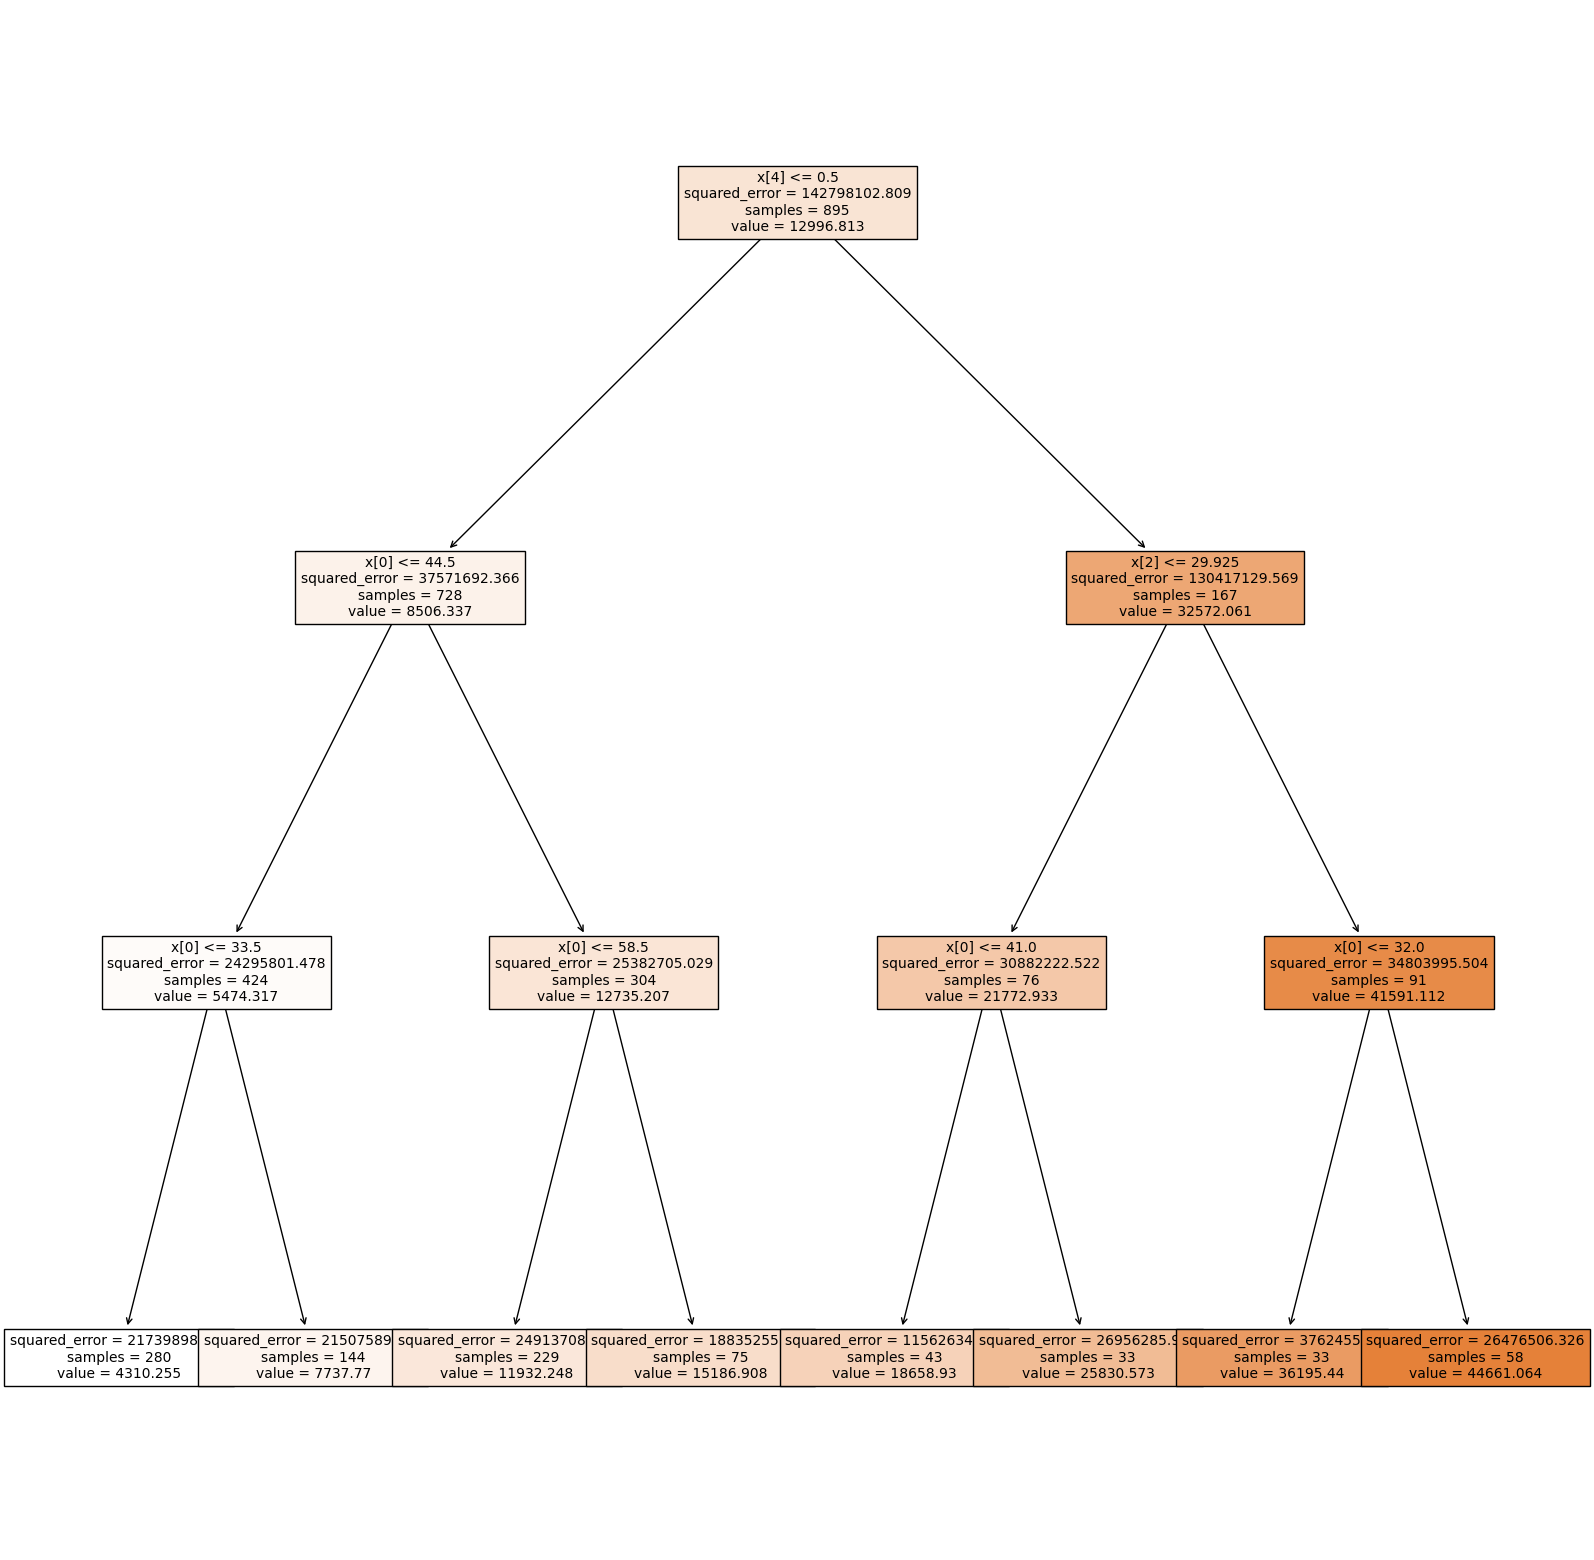

In [6]:
# Get the first estimator:
dt_model = model.named_steps["regressor"]
dt_model = dt_model.estimators_[0]

fig, ax = plt.subplots(figsize = (20, 20))
plot_tree(dt_model, filled = True, ax = ax, max_depth = 3, fontsize = 10)
plt.show()